In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('multiTimeline.csv', skiprows=1)

In [7]:
df.head()

,Week,vegan: (Worldwide)
0,2014-06-01,31
1,2014-06-08,31
2,2014-06-15,31
3,2014-06-22,32
4,2014-06-29,32


In [8]:
df.columns

Index(['Week', 'vegan: (Worldwide)'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
Week                  261 non-null object
vegan: (Worldwide)    261 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [10]:
from datetime import datetime

In [11]:
df.Week=pd.to_datetime(df.Week)

In [12]:
df.head()

,Week,vegan: (Worldwide)
0,2014-06-01,31
1,2014-06-08,31
2,2014-06-15,31
3,2014-06-22,32
4,2014-06-29,32


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
Week                  261 non-null datetime64[ns]
vegan: (Worldwide)    261 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


In [15]:
df.set_index('Week',inplace=True)

In [16]:
df.head()

,vegan: (Worldwide)
Week,
2014-06-01,31
2014-06-08,31
2014-06-15,31
2014-06-22,32
2014-06-29,32


In [17]:
df['2015-01']

,vegan: (Worldwide)
Week,
2015-01-04,38
2015-01-11,36
2015-01-18,35
2015-01-25,36


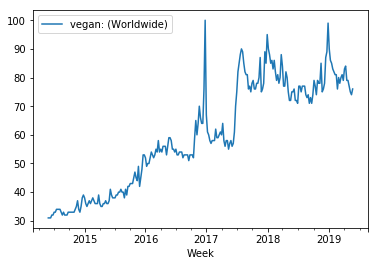

In [18]:
df.plot()

In [20]:
type(df)

pandas.core.frame.DataFrame

In [21]:
vegan = df['vegan: (Worldwide)']

In [22]:
vegan

Week
2014-06-01    31
2014-06-08    31
2014-06-15    31
2014-06-22    32
2014-06-29    32
2014-07-06    33
2014-07-13    33
2014-07-20    34
2014-07-27    34
2014-08-03    34
2014-08-10    34
2014-08-17    33
2014-08-24    32
2014-08-31    33
2014-09-07    32
2014-09-14    32
2014-09-21    32
2014-09-28    33
2014-10-05    33
2014-10-12    33
2014-10-19    33
2014-10-26    33
2014-11-02    33
2014-11-09    34
2014-11-16    35
2014-11-23    37
2014-11-30    34
2014-12-07    33
2014-12-14    35
2014-12-21    38
              ..
2018-11-04    78
2018-11-11    78
2018-11-18    85
2018-11-25    75
2018-12-02    76
2018-12-09    78
2018-12-16    87
2018-12-23    89
2018-12-30    99
2019-01-06    90
2019-01-13    86
2019-01-20    85
2019-01-27    83
2019-02-03    82
2019-02-10    81
2019-02-17    81
2019-02-24    76
2019-03-03    80
2019-03-10    78
2019-03-17    80
2019-03-24    81
2019-03-31    79
2019-04-07    83
2019-04-14    84
2019-04-21    79
2019-04-28    79
2019-05-05    77
2019-05-1

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
decomposition = seasonal_decompose(vegan, model='multiplicative', freq=52)

In [25]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

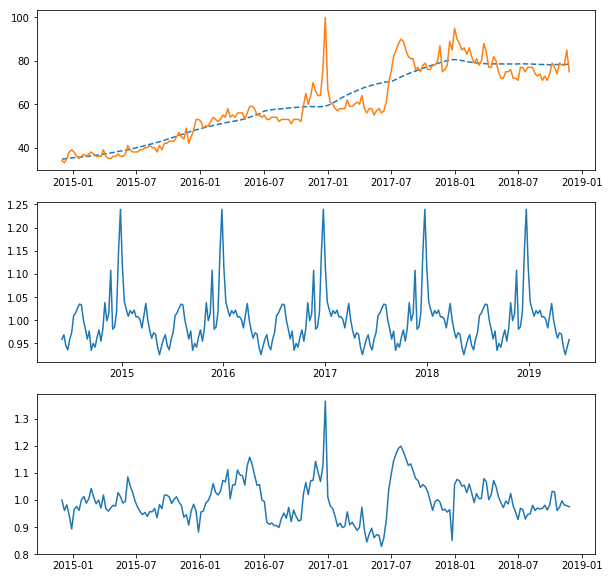

In [31]:
plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(311)

plt.plot(trend,linestyle='--', label = 'Trend')
plt.plot(trend * residual * seasonal, label = 'Original')

plt.subplot(312)
plt.plot(seasonal, label='Seasonality')

plt.subplot(313)
plt.plot(residual, label = 'Randomness')

# ARIMA (p,d,q)

In [33]:
# ar (p)= autoregressive (how can we calculate what happens today based on what happened yesterday given the trend in your data)
# i (d)= intergrated
# ma (q)= moving average

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

(0, 50)

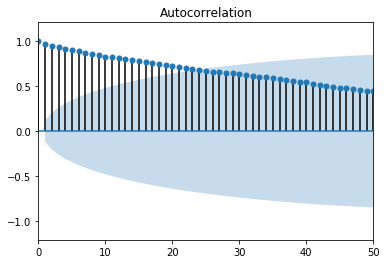

In [36]:
plot_acf(vegan)
plt.xlim(0,50)

In [37]:
diff = vegan.diff(1).dropna()

In [39]:
decomposition = seasonal_decompose(diff, model='additive', freq=52)

In [40]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

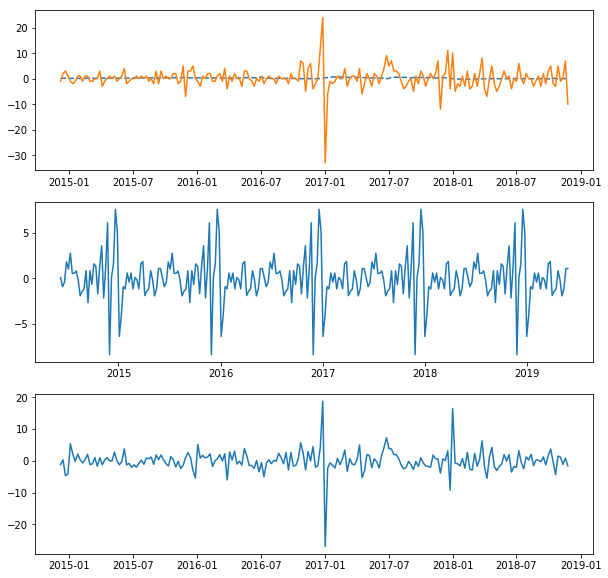

In [41]:
plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(311)

plt.plot(trend,linestyle='--', label = 'Trend')
plt.plot(trend + residual + seasonal, label = 'Original')

plt.subplot(312)
plt.plot(seasonal, label='Seasonality')

plt.subplot(313)
plt.plot(residual, label = 'Randomness')


# Finding q

(0, 10)

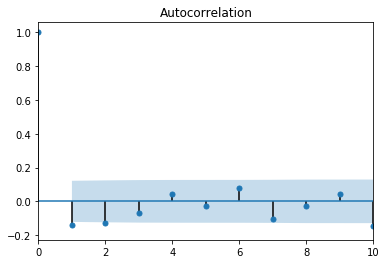

In [52]:
plot_acf(diff)
plt.xlim(0,10)

q = 2

(-1, 10)

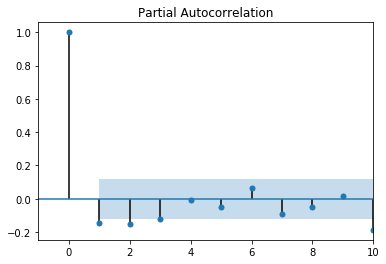

In [82]:
plot_pacf(diff,lags=10)
plt.xlim(-1,10)

In [59]:
#p=3

In [68]:
train = vegan[:'06-2018']
test = vegan ['06-2018':]

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [70]:
model = SARIMAX(train, order=(3,1,2), seasonal_order=(1,1,0,52),enforce_invertibility=False,enforce_stationarity=False)

T:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


In [71]:
results = model.fit()

In [72]:
predict = results.predict(start='06-2018', end='06-2019')

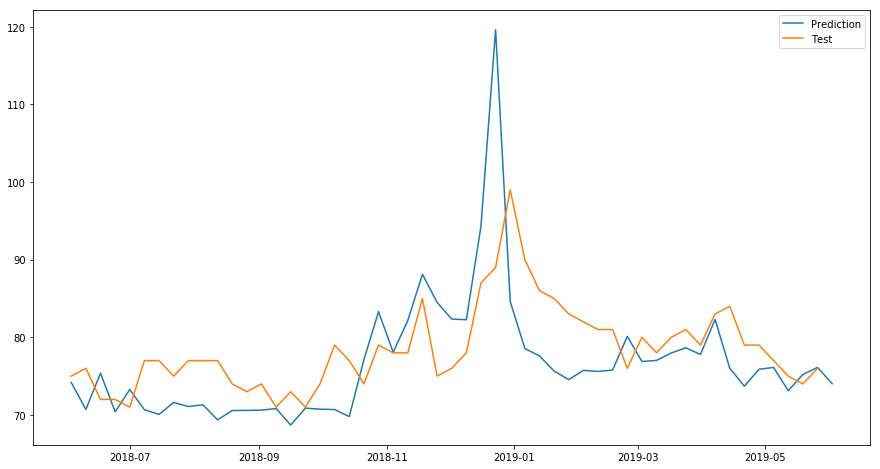

In [73]:
plt.figure(figsize=(15,8))

plt.figure(1)

plt.plot(predict,label='Prediction')
plt.plot(test, label='Test')
plt.legend()

In [78]:
train = vegan[:'06-2018']
test = vegan ['06-2014':]

In [79]:
full_predict = results.predict(start='06-2014',end='06-2019')[2:]

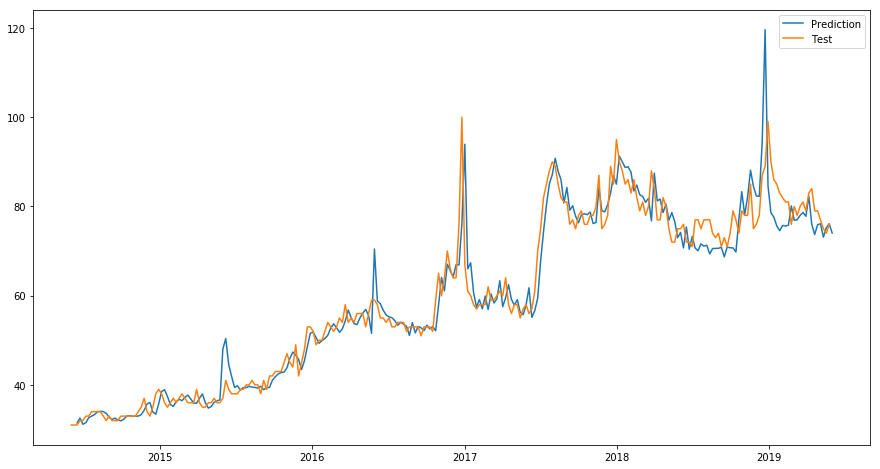

In [80]:
plt.figure(figsize=(15,8))

plt.figure(1)

plt.plot(full_predict,label='Prediction')
plt.plot(test, label='Test')
plt.legend()

In [81]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                 vegan: (Worldwide)   No. Observations:                  213
Model:             SARIMAX(3, 1, 2)x(1, 1, 0, 52)   Log Likelihood                -319.725
Date:                            Fri, 31 May 2019   AIC                            653.450
Time:                                    17:35:00   BIC                            672.028
Sample:                                06-01-2014   HQIC                           660.978
                                     - 06-24-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3105      0.700     -1.871      0.061      -2.683       0.062
ar.L2         -0.7842      0.713     -1.100      0.271      -2.181       0.613
ar.L3         -0.2309      0.174     -1.330      0.183      -0.571       0.109
ma.L1          1.1622      0.691      1.681      0.093      -0.193       2.517
ma.L2          0.4381      0.670      0.654      0.513      -0.876       1.752
ar.S.L52      -1.0469      0.094    -11.105      0.000      -1.232      -0.862
sigma2        25.8397      2.152     12.008      0.000      21.622      30.057
===================================================================================
Ljung-Box (Q):                       10.85   Jarque-Bera (JB):               450.83
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""